In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [33]:
# Read the data
X = pd.read_csv('./ames_housing_train.csv', index_col='Id') 
X_test = pd.read_csv('./ames_housing_test.csv', index_col='Id')

X.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Drop rows with missing values in target
X_new = X.copy()
X_new.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_new.SalePrice
X_new.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll use only numerical predictors
X_new = X_new.select_dtypes(exclude=['object'])
X_test = X_test.select_dtypes(exclude=['object'])

In [4]:
X_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, train_size=0.75, test_size=0.25, random_state=0)

In [6]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid, n):
    model = RandomForestRegressor(n_estimators=n, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [7]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# List of columns with NaN values
miss_cols = X_train.columns[X_train.isnull().any()]

(1095, 36)
LotFrontage    199
MasVnrArea       5
GarageYrBlt     56
dtype: int64


In [8]:
# At first, we just drop the columns with missing values

reduced_X_train = X_train.drop(miss_cols, axis = 1)
reduced_X_valid = X_valid.drop(miss_cols, axis = 1)
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid, 100))

MAE (Drop columns with missing values):
17668.575013698628


In [9]:
estimators = [10, 50, 100, 150, 200, 250]

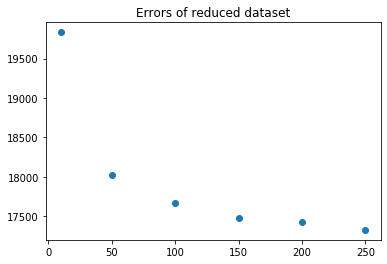

In [10]:
errors = []
for e in estimators:
    errors.append(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid, e))
    
plt.scatter(estimators, errors)
plt.title('Errors of reduced dataset')
plt.show()

# Set the width and height of the figure
plt.figure(figsize=(12,8))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.lmplot(x="2ndFlrSF", y="SalePrice", hue="Alley", data=X, height=7, aspect=1.6)

# Add label for vertical axis
plt.ylabel("Sale Price")
plt.show()

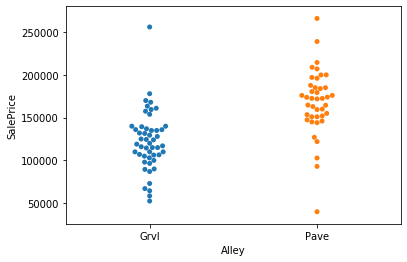

In [11]:
sns.swarmplot(x=X['Alley'],
              y=X['SalePrice'])
plt.show()

# Imputation

In [12]:
# Fill in the lines below: imputation
my_imputer = SimpleImputer(strategy = 'median')

imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))


# Fill in the lines below: imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

In [13]:
print("MAE (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid, 100))

MAE (Imputation):
17613.35904109589


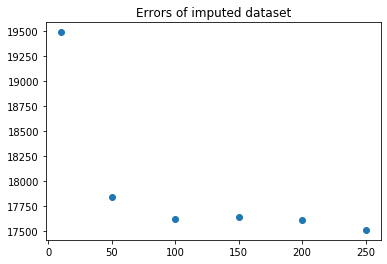

In [14]:
errors = []
for e in estimators:
    errors.append(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid, e))
    
plt.scatter(estimators, errors)
plt.title('Errors of imputed dataset')
plt.show()

# Categorical Variables

In [34]:
# Read the data
X = pd.read_csv('./ames_housing_train.csv', index_col='Id') 
X_test = pd.read_csv('./ames_housing_test.csv', index_col='Id')

# Define target
X_new = X.copy()
X_new.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_new.SalePrice
X_new.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X_new.columns if X_new[col].isnull().any()] 
X_new.drop(cols_with_missing, axis=1, inplace=True)
X_test.drop(cols_with_missing, axis=1, inplace=True)

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, train_size=0.8, test_size=0.2, random_state=0)

In [17]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]

# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols)) 

print('Categorical columns that will be label encoded:', good_label_cols)

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'ExterQual', 'CentralAir', 'KitchenQual', 'PavedDrive', 'SaleCondition']


In [18]:
# Problematic columns that will be dropped from the dataset

label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder 
encoder = LabelEncoder()

for col in good_label_cols:
    label_X_train[col] = encoder.fit_transform(X_train[col])
    label_X_valid[col] = encoder.transform(X_valid[col])

In [19]:
print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid, 100))

MAE from Approach 2 (Label Encoding):
17575.291883561644


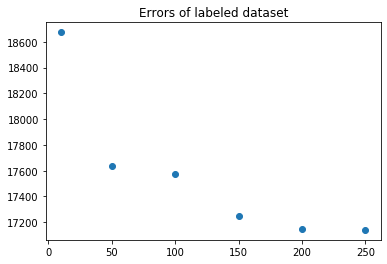

In [20]:
errors = []
for e in estimators:
    errors.append(score_dataset(label_X_train, label_X_valid, y_train, y_valid, e))
    
plt.scatter(estimators, errors)
plt.title('Errors of labeled dataset')
plt.show()

In [21]:
# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

Categorical columns that will be one-hot encoded: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['Neighborhood', 'Exterior2nd', 'Exterior1st']


In [22]:
''' Implementing one hot encoder '''
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))

OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [23]:
print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid, 100))

MAE from Approach 3 (One-Hot Encoding):
17525.345719178084


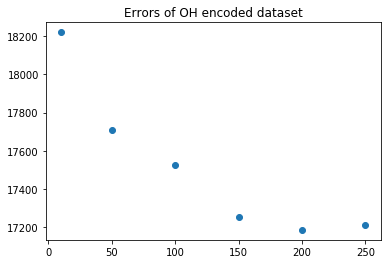

In [24]:
errors = []
for e in estimators:
    errors.append(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid, e))
    
plt.scatter(estimators, errors)
plt.title('Errors of OH encoded dataset')
plt.show()

## Pipelines

In [25]:
# Categorical data
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Numerical data
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != "object"]

In [26]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define our model
model = RandomForestRegressor(n_estimators=200, random_state=0)

In [27]:
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17112.16533675799


In [28]:
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [17392.66656393 17344.91157534 17570.7835274  15942.95299087
 19143.23506849]


## Testing

In [29]:
# Fill in the line below: get test predictions
preds_test = my_pipeline.predict(X_test)

In [30]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

In [32]:
from xgboost import XGBRegressor

In [44]:
# Read the data
X = pd.read_csv('./ames_housing_train.csv', index_col='Id')
X_test_full = pd.read_csv('./ames_housing_test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice              
X.drop(['SalePrice'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)


In [45]:
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

/Users/iuliiaskobleva/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:56:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
preds_test = my_model.predict(X_test)

In [47]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)